## Does Crime Rate Rise Particualary in Warmer Seasons?

### 1. Introudction 

I have read one research on how the weather gives an influence on the occurrence of the crime rate.  Thier finding has suggested that especially violent crimes and disorderly conduct could noticeably be higher in the warmest month of year.  This simple conclusion could motivate me to undertake an analysis to see whether the temperature of weather does give an influence on criminal behavior or thier finding is applicable only to the region in which the study was undertaken. 

In ordert to demonstrate justification of the result, I obtain the data named  _Sanfrancisco criminal classifcation_ from kaggle  and if interested in further details of the data, you can visit the website below. 

[https://www.kaggle.com/c/sf-crime/data]


In [26]:
import numpy as np
import pandas as pd
%xmode Plain
data=pd.read_csv(r"C:\Users\DAVID SEO\Downloads\crime\crime_modified.csv")
data.head()


Exception reporting mode: Plain


,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET
0,Larceny,D14,808,2018,9,Sunday,13,LINCOLN ST
1,Vandalism,C11,347,2018,8,Tuesday,0,HECLA ST
2,Towed,D4,151,2018,9,Monday,19,CAZENOVE ST
3,Investigate Property,D4,272,2018,9,Monday,21,NEWCOMB ST
4,Investigate Property,B3,421,2018,9,Monday,21,DELHI ST


### 2. Data Manipualtion

In [30]:
#renaming the columns in samll capital
col=["offense_code",'district','area','year','month','day','hour','street']
data.columns=col
data.head()

,offense_code,district,area,year,month,day,hour,street
0,Larceny,D14,808,2018,9,Sunday,13,LINCOLN ST
1,Vandalism,C11,347,2018,8,Tuesday,0,HECLA ST
2,Towed,D4,151,2018,9,Monday,19,CAZENOVE ST
3,Investigate Property,D4,272,2018,9,Monday,21,NEWCOMB ST
4,Investigate Property,B3,421,2018,9,Monday,21,DELHI ST



To check if there are any missing values in the suggested columns, we implmented isnull().any() function. It returs True if Null exits and False if it doesnt. 

In [31]:
data.isnull().any()


offense_code    False
district         True
area            False
year            False
month           False
day             False
hour            False
street           True
dtype: bool

We have two colums with some missing values and these are all related to local address infomration. 
Actaully, to fill out the missing entires with appporiate titles is considered  unnecessary  soley in our case study. What we are aming at is to test realiablity and validatiy of the incidence of the unlawful act depending on climatic. To take urban as a determinant of cirme rate may give a rise to confusion or disturbance to our finding. In the later step, we will filter out any fields of state,area,and area code.

In [32]:
data.loc[data.district.isnull(),'district']='Not Specified'
data.loc[data.street.isnull(),'street']='Not Specified'

In [33]:
import copy 
# to obtain the total counts of each offense and arrange them in descending order 
test=data.copy()
test=test.loc[:,["offense_code","year","month","day","hour"]] ## filter out unnecessary infomraiton 
df=test.groupby("offense_code")["year"].count().sort_values(ascending=False) #crate a separate section for counts grouped by offense_code
df_cumsum=df.cumsum() # cumulative sum of the total counts 
# For convenience of data manipuation,create a separate DataFrame object to contain the information counts and cumulative counts
decile=pd.DataFrame({"counts":df,"cumulative_sum":df_cumsum})
#To add two addition columnsfor the percentage of each incidence of crime and its cumulative percentage 
decile["percentage"]=100*decile["counts"]/decile["counts"].sum()
decile["cum_percentage"]=decile["percentage"].cumsum()
#create a separate section to give a level of frequency of crime whic ranges from very high to rare.
decile["rank"]=pd.qcut(decile["counts"],5,labels=["rare","low","frequent","high","very high"])
decile_index=decile.loc[:"Assembly or Gathering Violations",:].index
decile[decile["rank"]=="frequent"].tail()


,counts,cumulative_sum,percentage,cum_percentage,rank
offense_code,,,,,
Auto Theft Recovery,1051,309128,0.329392,96.883158,frequent
Ballistics,981,310109,0.307453,97.190612,frequent
Landlord/Tenant Disputes,968,311077,0.303379,97.493990,frequent
Search Warrants,966,312043,0.302752,97.796742,frequent
Assembly or Gathering Violations,955,312998,0.299305,98.096047,frequent


In [34]:
#Store crime types of our interest in the object
decile_index=decile.loc[:"Assembly or Gathering Violations",:].index 
#Set up index of data using the column of offense
data=data.set_index("offense_code")
#Select the row entires according to decile_index
data=data.loc[decile_index]
data.tail()

,district,area,year,month,day,hour,street
offense_code,,,,,,,
Assembly or Gathering Violations,B2,603,2015,6,Sunday,0,TREMONT ST
Assembly or Gathering Violations,C11,348,2015,6,Thursday,10,FREEPORT ST
Assembly or Gathering Violations,B2,605,2015,6,Thursday,1,SHEPHERD AVE
Assembly or Gathering Violations,A1,120,2015,6,Wednesday,16,PARK PLZ
Assembly or Gathering Violations,D4,598,2015,6,Tuesday,16,DALTON ST


Unfortunately, we can not currently get access to all the entries in some period based on the data provided on Kaggle. Some information is unavailable from January to May in the year 2015 and from October to December in the year 2016, respectively.  Also, you should easily notice that the total number of crime incidence is strangely lower in September of the year 2018 than in the same month of other years.


In [38]:
data.groupby(["year","month"])["day"].count()

year  month
2015  6        4114
      7        8121
      8        8116
      9        8216
      10       8150
      11       7679
      12       7829
2016  1        7694
      2        7151
      3        8038
      4        7932
      5        8424
      6        8400
      7        8413
      8        8785
      9        8376
      10       8450
      11       7806
      12       7824
2017  1        7839
      2        7279
      3        8027
      4        7923
      5        8533
      6        8825
      7        8853
      8        9003
      9        8776
      10       8680
      11       7808
      12       7401
2018  1        7644
      2        6812
      3        7597
      4        7780
      5        8751
      6        8697
      7        8385
      8        8211
      9         656
Name: day, dtype: int64

In oder to gain justification for fairness and objectiveness,We need to make special treamets to deal with missing infomraiton 

First, missing entries are filled by the average amount of the same month of other years. 

Second, we think of the incidence in September of 2018 as an outlier or anomaly. It is also replaced with the average value  


In [39]:
#split data into groups according to year and month 
#and transform one of multi-index (ie month) into colum by using unstack function
year_month_test=data.groupby(["year","month"])["hour"].count().unstack()
#treating the observation made in Sep of 2018 as NaN
year_month_test.iloc[3,8]=np.nan
print(year_month_test)

month      1       2       3       4       5       6       7       8       9   \
year                                                                            
2015      NaN     NaN     NaN     NaN     NaN  4114.0  8121.0  8116.0  8216.0   
2016   7694.0  7151.0  8038.0  7932.0  8424.0  8400.0  8413.0  8785.0  8376.0   
2017   7839.0  7279.0  8027.0  7923.0  8533.0  8825.0  8853.0  9003.0  8776.0   
2018   7644.0  6812.0  7597.0  7780.0  8751.0  8697.0  8385.0  8211.0     NaN   

month      10      11      12  
year                           
2015   8150.0  7679.0  7829.0  
2016   8450.0  7806.0  7824.0  
2017   8680.0  7808.0  7401.0  
2018      NaN     NaN     NaN  


In [40]:
#Calculate the average for month with missing infomration 
value=year_month_test.mean()[year_month_test.isnull().any()]
#fill the missing values with computed values
year_month_test=year_month_test.fillna(value).stack()


In [46]:
#grouping based on an index, use level clause
month_test=year_month_test.sum(level="month")
month_test=round(month_test,2)
month_test

month
1     30902.67
2     28322.67
3     31549.33
4     31513.33
5     34277.33
6     30036.00
7     33772.00
8     34115.00
9     33824.00
10    33706.67
11    31057.33
12    30738.67
dtype: float64

In [47]:
month_percentage=round(month_test/sum(month_test)*100,2)
percentage_mean=month_percentage.mean()
month_percentage


month
1     8.05
2     7.38
3     8.22
4     8.21
5     8.93
6     7.83
7     8.80
8     8.89
9     8.81
10    8.78
11    8.09
12    8.01
dtype: float64

### 3. Chart

Text(0.5, 1.0, ' Incidents of violence in the 12 months')

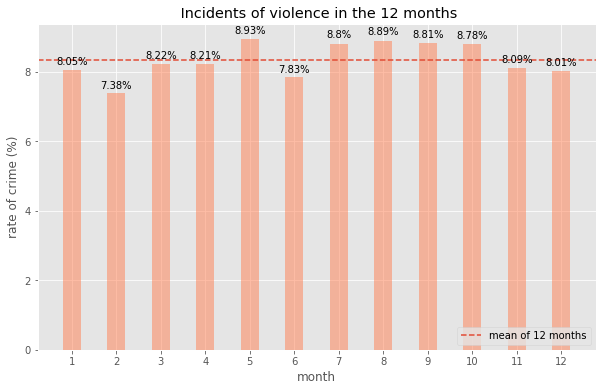

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager,rc
from matplotlib import style

plt.style.use("ggplot")
x_name=list(data.groupby("month")["year"].groups.keys())
n_groups=len(data.groupby("month")["year"].groups.keys())
y_value=list(month_percentage)
ypos=np.arange(n_groups)+1

fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
rects=plt.bar(ypos,y_value,width=0.4,align="center",color="coral",alpha=0.5)
plt.xticks(x_name)

for i,rect in enumerate(rects):
    ax.text(rect.get_x()+rect.get_width()/2.0,1.02*rect.get_height(),str(y_value[i])+'%',ha="center")
plt.axhline(y=percentage_mean,linestyle='--',label='mean of 12 months')
plt.legend(loc="lower right")
plt.xlabel("month")
plt.ylabel("rate of crime (%)")
plt.title(" Incidents of violence in the 12 months")

month    1     2     3     4     5     6     7     8     9     10    11    12
year                                                                         
2015   8.46  7.75  8.63  8.62  9.38  4.50  8.89  8.88  8.99  8.92  8.40  8.57
2016   7.91  7.35  8.26  8.15  8.66  8.63  8.65  9.03  8.61  8.69  8.02  8.04
2017   7.92  7.36  8.11  8.01  8.62  8.92  8.95  9.10  8.87  8.77  7.89  7.48
2018   7.95  7.08  7.90  8.09  9.10  9.04  8.72  8.53  8.79  8.76  8.07  7.99


Text(0.5, 1.0, 'Criminal rate in the years from 2015to 2018')

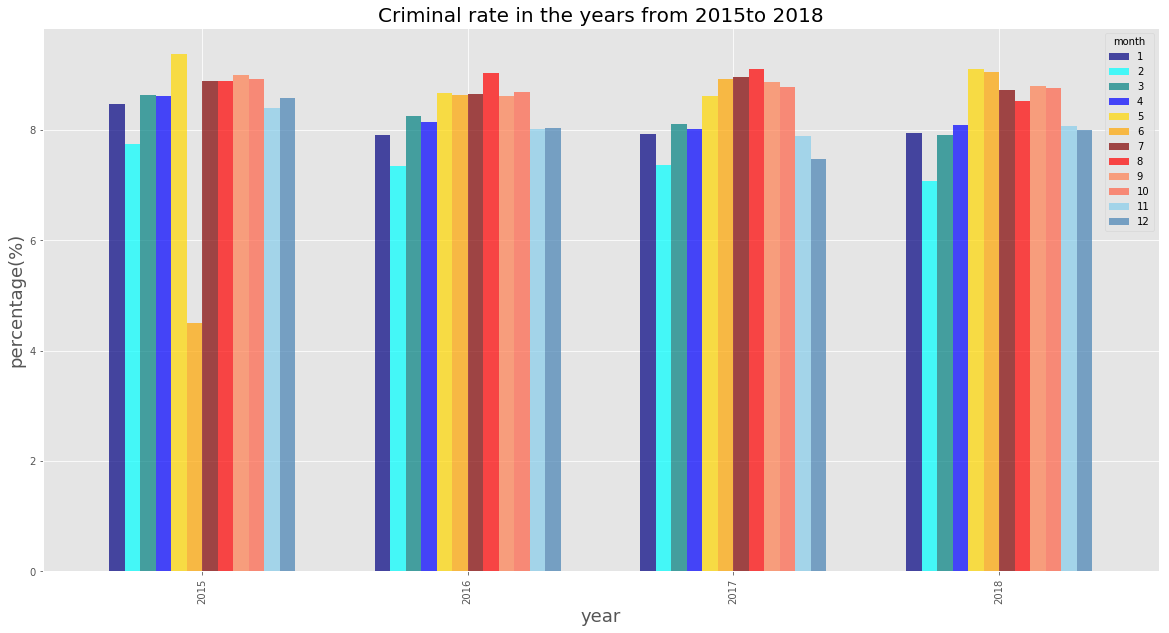

In [86]:
final_data=year_month_test.unstack()
final_data_sum=list(final_data.sum(axis=1))
result=round(final_data.divide(final_data_sum,axis=0)*100,2)
print(result)
colors=["navy","cyan","teal","blue","gold","orange","maroon","red","coral","tomato","skyblue","steelblue"]
ax=result.plot(kind="bar",figsize=(20,10),width=0.7,color=colors,alpha=0.7)
ax.set_xlabel("year",fontsize=18)
ax.set_ylabel("percentage(%)",fontsize=18)
ax.set_title("Criminal rate in the years from 2015to 2018",size=20)

# 4 Summarizing Results 



The first bar graph demonstrates the incidence of crime in the 12 months. Generally, it can be seen that the rate tends to be recorded high in the warmer and hotter time. The figures in the period between May and October are almost above the average and recorded at quite a higher level than any other months. During the seasons, in this part of the country, the temperature usually heats up around May or June.  It is also worthy of noting that there is a quite dramatic leap in the amount between April and May and a drop between October and November. The rate usually keeps decreasing as the state cools off a few degrees, reaching rock bottom at 7.38% in February. We could leap to the conclusion that crime soars along with temperature to some point after which it becomes too hot' and crime rate steadily decreases to reach the lowest score. 

However, this is disputed because our chart shows that the rate for June is below average when the temperature is considered quite as high a 24 degree or 66 Fahrenheit. Its percentage is also considered remarkably lower than in hotter periods. I guessed that some number in any year from 2015 to 2018 is unreasonably lower than thier normal level for some reasons. My initial expectation is right. If you take a closer look at the rate in June of the year 2015, the figure has an absurd record at 4.50 %, which is almost half of the normal rate in this season. This brings down the figure to be below average, distorting the trend we can derive from the data. Apar from this anomalous situation, every June there is at least the same accusation of crime as summer seasons with having the second greatest percentage in the year of 2018.

This simple chart analysis can not make a solid assertion that there must be a link of rising crime to rising temperatures. It is highly doubtable that the temperature alone is the explanation for this phenomenon. Therefore, further research is requested to be undertaken to back up the fact. 